In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [25]:
df_device_client = pd.read_csv('device_client.csv', sep = ';')
print(df_device_client)
df_payment_client = pd.read_csv('payment_client.csv', sep = ';')
#print(df_payment_client)

     id_client     type
0        19091      ios
1        18768       PC
2        19080       PC
3        18396      ios
4        18461      ios
..         ...      ...
774      18609  android
775      18605  android
776      18963      ios
777      18912      ios
778      19110       PC

[779 rows x 2 columns]


Text(0.5, 1.0, 'Распределение клиентских платежей')

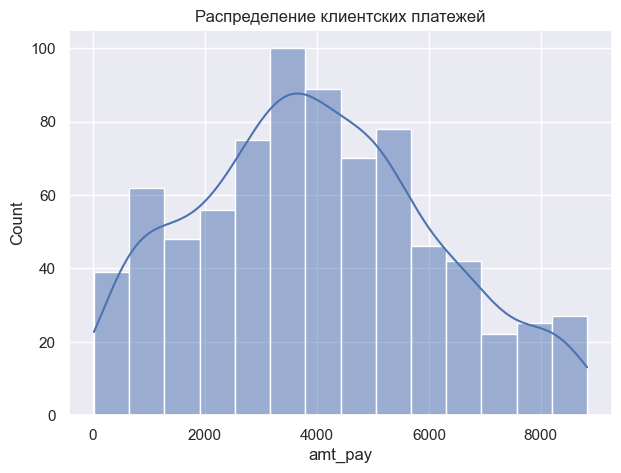

In [24]:
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(data=df_payment_client, x="amt_pay", kde = True)
plt.title('Распределение клиентских платежей')

In [16]:
m = df_payment_client['amt_pay'].mean()
s = df_payment_client['amt_pay'].std()

print('Среднее = ', m)
print('Сигма = ', s)

Среднее =  3961.2182284980745
Сигма =  2124.655341443493


In [20]:
df_one_sigma = df_payment_client[(df_payment_client['amt_pay'] >= m - s) & (df_payment_client['amt_pay'] <= m + s)]
df_two_sigma = df_payment_client[(df_payment_client['amt_pay'] >= m - 2*s) & (df_payment_client['amt_pay'] <= m + 2*s)]
df_three_sigma = df_payment_client[(df_payment_client['amt_pay'] >= m - 3*s) & (df_payment_client['amt_pay'] <= m + 3*s)]

In [23]:
print('Доля наблюдений в 1 сигме', df_one_sigma.count()['id_client'] / df_payment_client.count()['id_client'])
print('Доля наблюдений в 2 сигмах', df_two_sigma.count()['id_client'] / df_payment_client.count()['id_client'])
print('Доля наблюдений в 3 сигмах', df_three_sigma.count()['id_client'] / df_payment_client.count()['id_client'])

Доля наблюдений в 1 сигме 0.6469833119383825
Доля наблюдений в 2 сигмах 0.9666238767650834
Доля наблюдений в 3 сигмах 1.0


In [65]:
df_dev_pay = pd.merge(df_device_client, df_payment_client, how='left')
print(df_dev_pay)

df_ios = df_dev_pay.loc[df_dev_pay['type']=='ios']
df_PC = df_dev_pay.loc[df_dev_pay['type']=='PC']
df_android = df_dev_pay.loc[df_dev_pay['type']=='android']

# sns.set(rc={'figure.figsize':(7,5)})
# sns.histplot(data=df_payment_client, x="amt_pay", kde = True)
# plt.title('Распределение клиентских платежей')

     id_client     type  amt_pay
0        19091      ios     2957
1        18768       PC       86
2        19080       PC      638
3        18396      ios     3891
4        18461      ios     7598
..         ...      ...      ...
774      18609  android     4801
775      18605  android     4927
776      18963      ios       94
777      18912      ios     1568
778      19110       PC     2445

[779 rows x 3 columns]


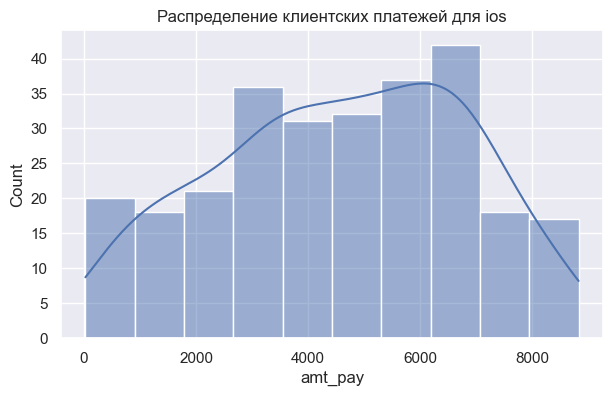

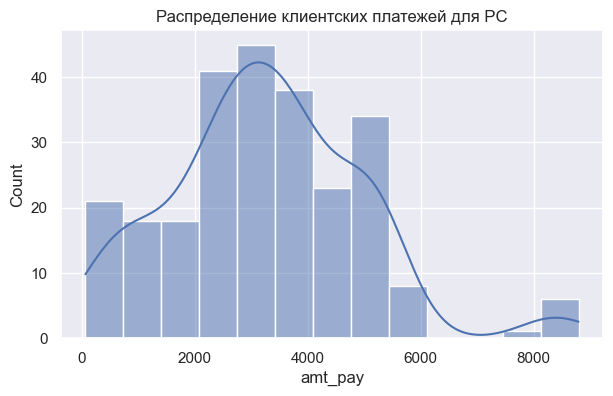

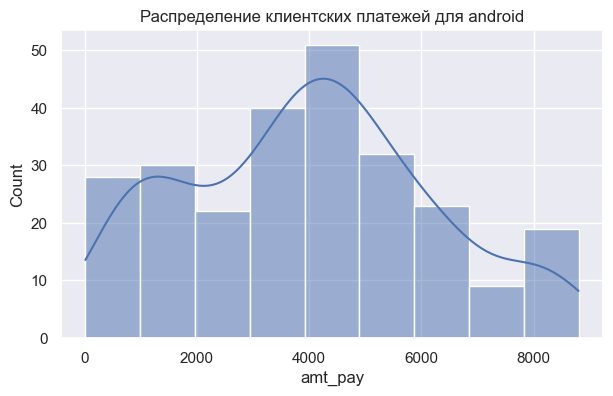

In [48]:
sns.set(rc={'figure.figsize':(7,4)})
sns.histplot(df_dev_pay.loc[df_dev_pay['type']=='ios'], x="amt_pay", kde = True)
plt.title('Распределение клиентских платежей для ios')
plt.show()
######

sns.set(rc={'figure.figsize':(7,4)})
sns.histplot(data=df_dev_pay.loc[df_dev_pay['type']=='PC'], x="amt_pay", kde = True)
plt.title('Распределение клиентских платежей для PC')
plt.show()

#######

sns.set(rc={'figure.figsize':(7,4)})
sns.histplot(data=df_dev_pay.loc[df_dev_pay['type']=='android'], x="amt_pay", kde = True)
plt.title('Распределение клиентских платежей для android')
plt.show()


In [125]:
m = df_dev_pay['amt_pay'].mean()
s = df_dev_pay['amt_pay'].std()

df_res = df_dev_pay.groupby('type')['amt_pay'].mean()
df_res = df_res.reset_index()

df_res['one_sigma']=((df_dev_pay[(df_dev_pay['amt_pay'] >= m - s) & (df_dev_pay['amt_pay'] <= m + s)].count()['id_client'])/df_dev_pay.count()['id_client'])

two_sigma = df_dev_pay[(df_dev_pay['amt_pay'] >= m - 2*s) & (df_dev_pay['amt_pay'] <= m + 2*s)]
df_res['two_sigma']=two_sigma.count()['id_client']/df_dev_pay.count()['id_client']

three_sigma = df_dev_pay[(df_dev_pay['amt_pay'] >= m - 3*s) & (df_dev_pay['amt_pay'] <= m + 3*s)]
df_res['tree_sigma']=three_sigma.count()['id_client']/df_dev_pay.count()['id_client']

df_res['diff1sigma'] = abs(df_res['one_sigma']-0.68)
df_res['diff2sigma'] = abs(df_res['two_sigma']-0.95)
df_res['diff3sigma'] = abs(df_res['tree_sigma']-0.997)

df_res = df_res.drop(columns = 'amt_pay') 

df_res.head()

,type,one_sigma,two_sigma,tree_sigma,diff1sigma,diff2sigma,diff3sigma
0,PC,0.646983,0.966624,1.0,0.033017,0.016624,0.003
1,android,0.646983,0.966624,1.0,0.033017,0.016624,0.003
2,ios,0.646983,0.966624,1.0,0.033017,0.016624,0.003


In [ ]:
#Задание 3


    